In [1]:
from tradingSimulator import TradingSimulator
simulator = TradingSimulator()

In [2]:
# strategy in {
#     'Buy and Hold',
#     'Sell and Hold',
#     'Trend Following Moving Averages',
#     'Mean Reversion Moving Averages',
#     'TDQN'
# }
# cryptocurrency in {'Bitcoin', 'Ethereum'}
# network in {"DQN", "LSTM", "BiLSTM", "DuelingDQN", "ConvDuelingDQN"}

In [3]:
# cryptocurrency = "Bitcoin"
# simulator.exploratoryDataAnalysis(cryptocurrency, '2014-01-01', '2021-01-01')

In [4]:
percentageCosts = [0, 0.1, 0.2]
transactionCosts = percentageCosts[1]/100
stateLength = 30
AI_TRAINING_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2017-01-01',
    'money': 100000,
    'percentageCosts': percentageCosts,
    'transactionCosts': transactionCosts,
    'name': 'training',
    'network': 'DQN',
    # Parameters related to the DQN algorithm
    'stateLength': stateLength,
    'numberOfEpisodes': 50,
    'gamma': 0.4,
    'learningRate': 0.0001,
    'targetNetworkUpdate': 1000,
    'learningUpdatePeriod': 1,
    # Default parameters related to the Experience Replay mechanism
    'capacity': 100000,
    'batchSize': 32,
    'experiencesRequired': 1000,
    # Default parameters related to the Deep Neural Network
    'numberOfNeurons': 512,
    'dropout': 0.2,
    # Default parameters related to the Epsilon-Greedy exploration technique
    'epsilonStart': 1.0,
    'epsilonEnd': 0.01,
    'epsilonDecay': 10000,
    # Default parameters regarding the sticky actions RL generalization technique
    'alpha': 0.1,
    # Default parameters related to preprocessing
    'filterOrder': 5,
    # Default paramters related to the clipping of both the gradient and the RL rewards
    'gradientClipping': 1,
    'rewardClipping': 1,
    # Default parameter related to the L2 Regularization 
    'L2Factor': 0.000001,
}

NON_AI_TRAINING_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2017-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'percentageCosts': percentageCosts,
    'transactionCosts': transactionCosts,
    'name': 'training',
    'network': ''
}

VALIDATION_PARAM = {
    'startingDate': '2017-01-01',
    'endingDate': '2019-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'validation',
    'network': '',
}

BACKTEST_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2021-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'backtest',
    'network': '',
}

TEST_PARAM = {
    'startingDate': '2019-01-01',
    'endingDate': '2021-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'test',
    'network': '',
}

ETH_TEST_PARAM = {
    'startingDate': '2019-01-01',
    'endingDate': '2021-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'test',
    'network': '',
}

Training1


  0%|          | 0/50 [00:00<?, ?it/s]

Training progression (hardware selected => cuda:0):


100%|██████████| 50/50 [05:40<00:00,  6.82s/it]


╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   TDQN   │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │  -57294  │
├───────────────────────────┼──────────┤
│     Annualized Return     │ -60.11%  │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │  58.86%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  -0.704  │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  -0.969  │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │  60.16%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 245 days │
├───────────────────────────┼──────────┤
│       Profitability       │  36.36%  │
├───────────────────────────┼──────────┤
│ Ratio Average Profit/Loss │  0.249   │
├───────────────────────────┼──────────┤
│         Skewness          │  0.407   │
╘═══════════════════════════╧══════════╛
Validation1
╒═══════════════════════════╤══════════╕
│   

  0%|          | 0/50 [00:00<?, ?it/s]

Training progression (hardware selected => cuda:0):


100%|██████████| 50/50 [11:57<00:00, 14.35s/it]


╒═══════════════════════════╤═════════╕
│   Performance Indicator   │  TDQN   │
╞═══════════════════════════╪═════════╡
│    Profit & Loss (P&L)    │  46126  │
├───────────────────────────┼─────────┤
│     Annualized Return     │ 20.32%  │
├───────────────────────────┼─────────┤
│   Annualized Volatility   │ 21.63%  │
├───────────────────────────┼─────────┤
│       Sharpe Ratio        │  0.713  │
├───────────────────────────┼─────────┤
│       Sortino Ratio       │  0.890  │
├───────────────────────────┼─────────┤
│     Maximum Drawdown      │ 24.59%  │
├───────────────────────────┼─────────┤
│ Maximum Drawdown Duration │ 54 days │
├───────────────────────────┼─────────┤
│       Profitability       │ 100.00% │
├───────────────────────────┼─────────┤
│ Ratio Average Profit/Loss │   inf   │
├───────────────────────────┼─────────┤
│         Skewness          │  0.257  │
╘═══════════════════════════╧═════════╛
Validation2
╒═══════════════════════════╤══════════╕
│   Performance Indicator  

  0%|          | 0/50 [00:00<?, ?it/s]

Training progression (hardware selected => cuda:0):


100%|██████████| 50/50 [17:59<00:00, 21.60s/it]


╒═══════════════════════════╤═══════════╕
│   Performance Indicator   │   TDQN    │
╞═══════════════════════════╪═══════════╡
│    Profit & Loss (P&L)    │  -90240   │
├───────────────────────────┼───────────┤
│     Annualized Return     │ -100.00%  │
├───────────────────────────┼───────────┤
│   Annualized Volatility   │  52.66%   │
├───────────────────────────┼───────────┤
│       Sharpe Ratio        │  -0.751   │
├───────────────────────────┼───────────┤
│       Sortino Ratio       │  -0.964   │
├───────────────────────────┼───────────┤
│     Maximum Drawdown      │  92.28%   │
├───────────────────────────┼───────────┤
│ Maximum Drawdown Duration │ 1013 days │
├───────────────────────────┼───────────┤
│       Profitability       │  46.83%   │
├───────────────────────────┼───────────┤
│ Ratio Average Profit/Loss │   0.968   │
├───────────────────────────┼───────────┤
│         Skewness          │   0.273   │
╘═══════════════════════════╧═══════════╛
Validation3
╒═════════════════════

  0%|          | 0/50 [00:00<?, ?it/s]

Training progression (hardware selected => cuda:0):


100%|██████████| 50/50 [24:14<00:00, 29.10s/it]


╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   TDQN   │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │  -99906  │
├───────────────────────────┼──────────┤
│     Annualized Return     │ -100.00% │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │ 156.65%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  -0.926  │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  -0.639  │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │ 100.02%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 848 days │
├───────────────────────────┼──────────┤
│       Profitability       │  0.00%   │
├───────────────────────────┼──────────┤
│ Ratio Average Profit/Loss │  0.000   │
├───────────────────────────┼──────────┤
│         Skewness          │ -23.963  │
╘═══════════════════════════╧══════════╛
Validation4
╒═══════════════════════════╤═════════╕
│   P

  0%|          | 0/50 [00:00<?, ?it/s]

Training progression (hardware selected => cuda:0):


100%|██████████| 50/50 [30:33<00:00, 36.66s/it]
/userhome/cs/u3569279/COMP3359_GP15_Deep_Reinforcement_Learning_in_Cryptocurrency_Algorithmic_Trading/tdqn/tradingEnv.py:266: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 8))
/userhome/cs/u3569279/COMP3359_GP15_Deep_Reinforcement_Learning_in_Cryptocurrency_Algorithmic_Trading/tdqn/TDQN.py:680: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/userhome/cs/u3569279/COMP3359_GP15_Deep_Reinforcement_Learning_in_Cryptocurrency_Algorithmic_Trading/tdqn/TDQN

╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   TDQN   │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │  289975  │
├───────────────────────────┼──────────┤
│     Annualized Return     │  30.25%  │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │  61.87%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  0.613   │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  0.804   │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │  83.91%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 376 days │
├───────────────────────────┼──────────┤
│       Profitability       │  28.57%  │
├───────────────────────────┼──────────┤
│ Ratio Average Profit/Loss │  3.439   │
├───────────────────────────┼──────────┤
│         Skewness          │  0.160   │
╘═══════════════════════════╧══════════╛



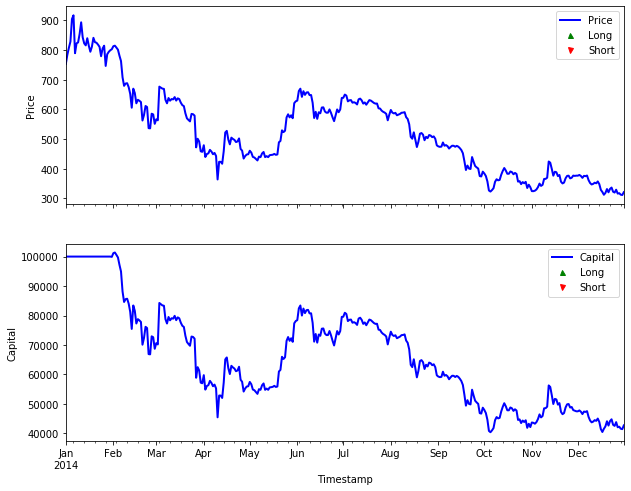

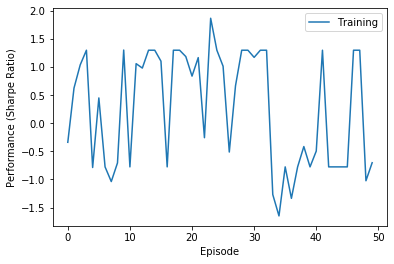

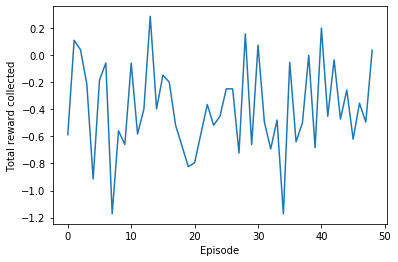

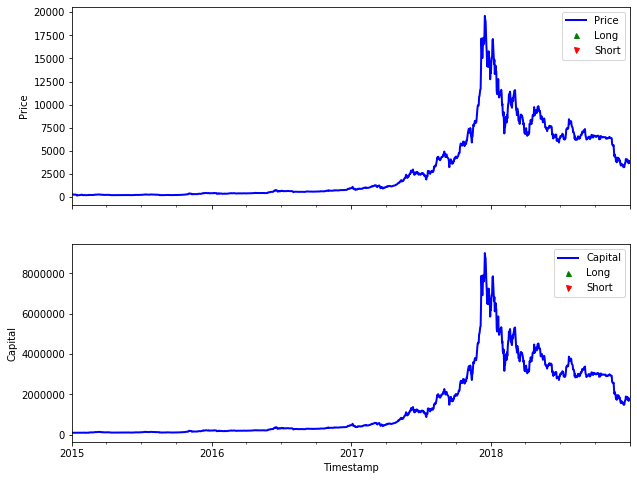

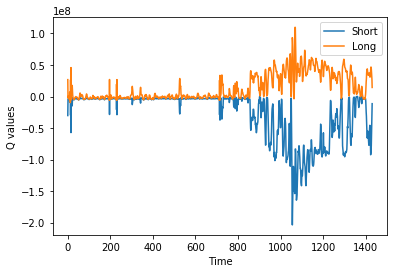

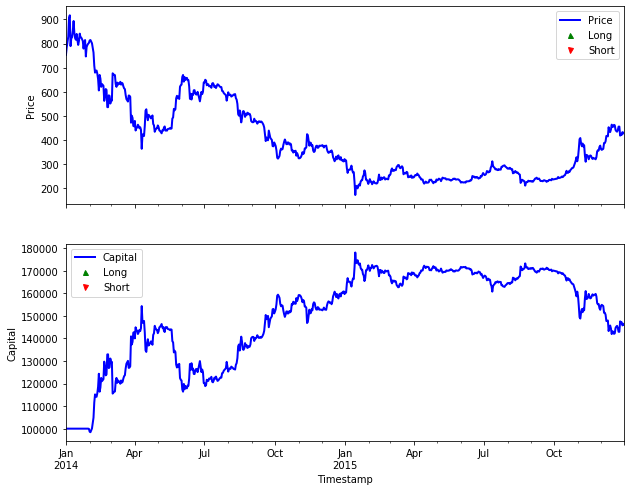

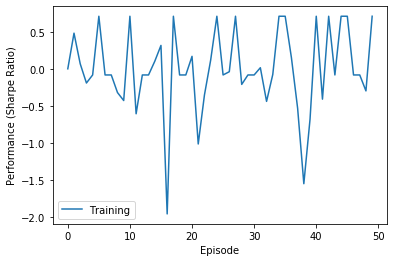

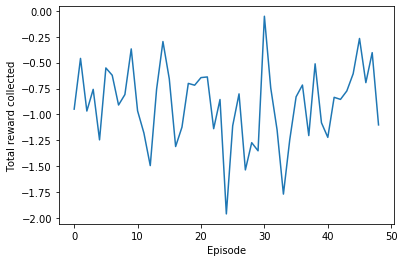

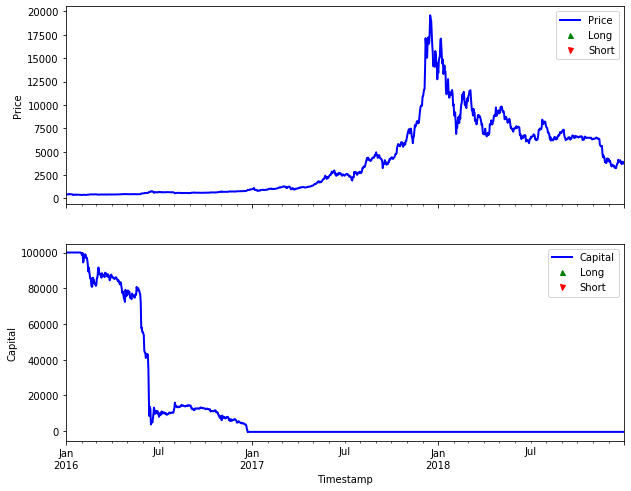

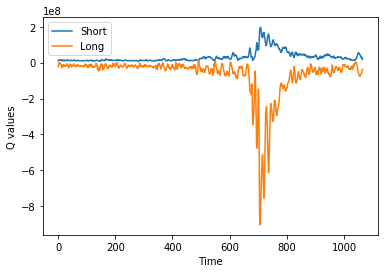

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
AI_TRAINING_PARAM['network'] = 'DQN'
AI_TRAINING_PARAM['name'] = 'btc_tdqn_DQN_training'
VALIDATION_PARAM['network'] = 'DQN'
VALIDATION_PARAM['name'] = 'btc_tdqn_DQN_validation'
simulator.aiTrainWithCrossValidation(strategy, trainCryptocurrency, AI_TRAINING_PARAM, VALIDATION_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
TEST_PARAM['name'] = 'btc_tdqn_DQN_test'
TEST_PARAM['network'] = 'DQN'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, AI_TRAINING_PARAM, TEST_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
BACKTEST_PARAM['name'] = 'btc_tdqn_DQN_backtest'
BACKTEST_PARAM['network'] = 'DQN'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, AI_TRAINING_PARAM, BACKTEST_PARAM)
print()

In [ ]:
# Haven't scraped eth s2f
# strategy = "TDQN"
# trainCryptocurrency = "Bitcoin"
# testCryptocurrency = "Ethereum"
# ETH_TEST_PARAM['name'] = 'eth_tdqn_DQN_test'
# ETH_TEST_PARAM['network'] = 'DQN'
# simulator.test(strategy, trainCryptocurrency, testCryptocurrency, AI_TRAINING_PARAM, ETH_TEST_PARAM)
# print()

In [ ]:
# strategy = "Mean Reversion Moving Averages"
# trainCryptocurrency = "Bitcoin"
# NON_AI_TRAINING_PARAM['name'] = 'btc_mrma_training'
# simulator.nonAiTrain(strategy, trainCryptocurrency, NON_AI_TRAINING_PARAM)
# print()

In [ ]:
# strategy = "Mean Reversion Moving Averages"
# trainCryptocurrency = "Bitcoin"
# testCryptocurrency = "Bitcoin"
# BACKTEST_PARAM['name'] = 'btc_mrma_backtest'
# simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_TRAINING_PARAM, BACKTEST_PARAM)
# print()

In [ ]:
# strategy = "Mean Reversion Moving Averages"
# trainCryptocurrency = "Bitcoin"
# testCryptocurrency = "Bitcoin"
# TEST_PARAM['name'] = 'btc_mrma_test'
# simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_TRAINING_PARAM, TEST_PARAM)
# print()

In [9]:
# strategy = "Mean Reversion Moving Averages"
# trainCryptocurrency = "Bitcoin"
# testCryptocurrency = "Ethereum"
# ETH_TEST_PARAM['name'] = 'eth_mrma_test'
# simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_TRAINING_PARAM, ETH_TEST_PARAM)
# print()